### Challenge Set 1  

**Topic:** Explore MTA turnstile data  
**Date:** 03 October 2016  
**Name:** Ron Olshansky-Lucero  
**Worked With:** Joshua Concepcion

In [162]:
# standard imports
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# jupyter-specific settings
from IPython.display import Image
%matplotlib inline

In [3]:
import datetime as dt # to work with time stamps

In [149]:
pd.set_option('display.precision', 3) # 3 decimal places
pd.set_option('display.max_rows', 20) # max rows 20

#### Exercise 1.1

Download a few MTA turnstile data files. Combine them and read them into a dataframe (pandas solution).

In [5]:
# read in last 4 weeks
wk1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt')
wk2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160910.txt')
wk3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160903.txt')
wk4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160827.txt')

In [6]:
# concatenate into one df with 4 weeks of data
# concat appends rows horizontally with no duplicate headings
df = pd.concat([wk1, wk2, wk3, wk4])
# df.info() # 772507 observations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772507 entries, 0 to 191611
Data columns (total 11 columns):
C/A                                                                     772507 non-null object
UNIT                                                                    772507 non-null object
SCP                                                                     772507 non-null object
STATION                                                                 772507 non-null object
LINENAME                                                                772507 non-null object
DIVISION                                                                772507 non-null object
DATE                                                                    772507 non-null object
TIME                                                                    772507 non-null object
DESC                                                                    772507 non-null object
ENTRIES                           

In [7]:
# note the filename format: 
# 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_YYMMDD.txt'
# can also define function to read in data for a list of week end dates (credit: Ramesh)

def get_data(weeks):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    df = [] # for list of weeks desired
    for week in weeks:
        file_url = url.format(week) # string formatting to replace {} with week
        df.append(pd.read_csv(file_url))
    return pd.concat(df)

In [8]:
weeks = [160917,160910,160903,160827]
df = get_data(weeks)
# df.info() # 772507 observations (same result as above approach)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772507 entries, 0 to 191611
Data columns (total 11 columns):
C/A                                                                     772507 non-null object
UNIT                                                                    772507 non-null object
SCP                                                                     772507 non-null object
STATION                                                                 772507 non-null object
LINENAME                                                                772507 non-null object
DIVISION                                                                772507 non-null object
DATE                                                                    772507 non-null object
TIME                                                                    772507 non-null object
DESC                                                                    772507 non-null object
ENTRIES                           

In [10]:
# strip any leading/trailing spaces
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180


In [12]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
191607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/26/2016,05:00:00,REGULAR,5554,257
191608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/26/2016,09:00:00,REGULAR,5554,257
191609,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/26/2016,13:00:00,REGULAR,5554,257
191610,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/26/2016,17:00:00,REGULAR,5554,257
191611,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/26/2016,21:00:00,REGULAR,5554,257


In [39]:
# count of observations for each date in the column 'DATE'
# e.g. there are 27270 observations with the 'DATE = '08/20/2016'
# .sort_index() sorts the counts by date
df.DATE.value_counts().sort_index()

08/20/2016    27270
08/21/2016    27665
08/22/2016    27369
08/23/2016    27311
08/24/2016    27341
08/25/2016    27398
08/26/2016    27258
08/27/2016    27290
08/28/2016    27300
08/29/2016    27828
              ...  
09/07/2016    27977
09/08/2016    28137
09/09/2016    27956
09/10/2016    27325
09/11/2016    27334
09/12/2016    28074
09/13/2016    27343
09/14/2016    27359
09/15/2016    27283
09/16/2016    28160
Name: DATE, dtype: int64

#### Exercise 1.2

Turn this into a time series. Convert the date and time columns and turn into datetime object.

In [40]:
df['DATE_TIME'] = df['DATE'] + '-' + df['TIME']
df.head() # new combined 'DATE_TIME'

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936,09/10/2016-00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940,09/10/2016-04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981,09/10/2016-08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094,09/10/2016-12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180,09/10/2016-16:00:00


Convert 'DATE_TIME' observations to datetime objects. Two ways: infer the format, or specify the format using strftime formatting.

In [41]:
# one way: infer datetime format
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], infer_datetime_format = True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936,2016-09-10 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940,2016-09-10 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981,2016-09-10 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094,2016-09-10 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180,2016-09-10 16:00:00


In [42]:
# another way: specify format from strftime
# pd.to_datetime(, format = “%d/%m/%Y”)
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format = '%m/%d/%Y-%H:%M:%S')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936,2016-09-10 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940,2016-09-10 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981,2016-09-10 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094,2016-09-10 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180,2016-09-10 16:00:00


In [43]:
df.DATE_TIME.dtype # dtype('<M8[ns]') - now a datetime object

dtype('<M8[ns]')

In [45]:
# create new df with just desired columns
dtdf = df[['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME', 'ENTRIES']]
dtdf.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-09-10 00:00:00,5817505
1,A002,R051,02-00-00,59 ST,2016-09-10 04:00:00,5817544
2,A002,R051,02-00-00,59 ST,2016-09-10 08:00:00,5817564
3,A002,R051,02-00-00,59 ST,2016-09-10 12:00:00,5817678
4,A002,R051,02-00-00,59 ST,2016-09-10 16:00:00,5817925


In [47]:
dtdf.info() # 772507 observations (as before)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772507 entries, 0 to 191611
Data columns (total 6 columns):
C/A          772507 non-null object
UNIT         772507 non-null object
SCP          772507 non-null object
STATION      772507 non-null object
DATE_TIME    772507 non-null datetime64[ns]
ENTRIES      772507 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 41.3+ MB


Confirm that there are no duplicate entries.

Check the uniqueness of records for every turnstile by grouping observations based on 'C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME', and counting 'ENTRIES'. Sort by 'ENTRIES' in descending order.

In [50]:
dtdf_grouped = (dtdf
 .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME']) # a unique turnstile
 .ENTRIES.count() # count entries for each turnstile
 .reset_index() # converts groupby object into a df
 .sort_values('ENTRIES', ascending = False) # sort by ENTRIES in descending order
)
dtdf_grouped

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
752394,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 20:00:00,2
752391,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 08:00:00,2
752386,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 12:00:00,2
683323,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
752387,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 16:00:00,2
752388,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 20:00:00,2
752398,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 12:00:00,2
752397,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 08:00:00,2
752389,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 00:00:00,2
752395,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 00:00:00,2


From the `dtdf_grouped` printout above, there seems to be a few turnstiles that have more than 1 entry for a specific date.

Use the grouping above to find out how many turnstile have duplicates.

In [60]:
mask = (dtdf_grouped['ENTRIES'] > 1)
dtdf_grouped[mask].sort_values('DATE_TIME')

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
752386,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 12:00:00,2
752387,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 16:00:00,2
752388,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 20:00:00,2
752389,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 00:00:00,2
752391,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 08:00:00,2
752392,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 12:00:00,2
752393,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 16:00:00,2
752394,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 20:00:00,2
752395,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 00:00:00,2
752397,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 08:00:00,2


In [61]:
df_grouped[mask].count()

C/A          12
UNIT         12
SCP          12
STATION      12
DATE_TIME    12
ENTRIES      12
dtype: int64

There are 12 possible turnstiles with duplicates. Check each of the duplicate observations above, by date.  

Use the masks on both the original dataframe `df`, which has more field/columns that may explain the reasons for duplicates, and on the smaller dt `dtdf`.  

Determine a pattern for duplicates and a strategy for removing them.

In [74]:
# 2016-08-20
mask1 = ((df["C/A"] == 'R634') &
         (df['UNIT'] == 'R069') &
         (df['SCP'] == '00-00-00') &
         (df['STATION'] == 'NEW LOTS AV') &
         (df['DATE_TIME'].dt.date == dt.datetime(2016,8,20).date()
         ))

In [75]:
df[mask1]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186612,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/20/2016,00:00:00,REGULAR,5167044,7056809,2016-08-20 00:00:00
186613,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/20/2016,04:00:00,REGULAR,5167103,7056952,2016-08-20 04:00:00
186614,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/20/2016,08:00:00,REGULAR,5167272,7057080,2016-08-20 08:00:00
186615,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/20/2016,12:00:00,REGULAR,5167472,7057279,2016-08-20 12:00:00
186616,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/20/2016,12:00:00,RECOVR AUD,12525478,2075574,2016-08-20 12:00:00
186617,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/20/2016,16:00:00,REGULAR,5167731,7057550,2016-08-20 16:00:00
186618,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/20/2016,16:00:00,RECOVR AUD,12525478,2075574,2016-08-20 16:00:00
186619,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/20/2016,20:00:00,REGULAR,5167916,7057938,2016-08-20 20:00:00
186620,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/20/2016,20:00:00,RECOVR AUD,12525478,2075574,2016-08-20 20:00:00


In [76]:
dtdf[mask1]

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
186612,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 00:00:00,5167044
186613,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 04:00:00,5167103
186614,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 08:00:00,5167272
186615,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 12:00:00,5167472
186616,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 12:00:00,12525478
186617,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 16:00:00,5167731
186618,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 16:00:00,12525478
186619,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 20:00:00,5167916
186620,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 20:00:00,12525478


Possible duplicates have `DESC` == 'RECOVR AUD'. The `ENTRIES` values for these observations seem to be suspect, because they jump to extreme values outside of what would be normal for cumulative counts.  

For instance, looking at just observations with DESC == REGULAR, a given timestamp (e.g. 2016-08-20 12:00:00) will have a value for `ENTRIES` (5,167,472) that is in line with the previous timestamp (2016-08-20 08:00:00, `ENTRIES` = 5,167,272) and the next timestamp (2016-08-20 16:00:00, `ENTRIES` = 5,167,731).

In contrast, it does not make sense for `ENTRIES` to go from 12,525,478 (2016-08-20 12:00:00, `DESC` == 'RECOVR AUD') to 5,167,731 (2016-08-20 16:00:00, `DESC` == 'REGULAR').  

In fact, all the observations with `DESC` == 'RECOVR AUD' for 2016-08-20 (12:00:00, 16:00:00, 20:00:00) all have the same value for `ENTRIES` (12,525,478).

In [72]:
df.DESC.value_counts()

REGULAR       770012
RECOVR AUD      2495
Name: DESC, dtype: int64

In [84]:
# 2016-08-21
mask2 = ((df["C/A"] == 'R634') &
         (df['UNIT'] == 'R069') &
         (df['SCP'] == '00-00-00') &
         (df['STATION'] == 'NEW LOTS AV') &
         (df['DATE_TIME'].dt.date == dt.datetime(2016,8,21).date()))

In [85]:
df[mask2]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186621,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,00:00:00,REGULAR,5168047,7058253,2016-08-21 00:00:00
186622,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,00:00:00,RECOVR AUD,12525478,2075574,2016-08-21 00:00:00
186623,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,04:00:00,REGULAR,5168116,7058430,2016-08-21 04:00:00
186624,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,08:00:00,REGULAR,5168244,7058564,2016-08-21 08:00:00
186625,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,08:00:00,RECOVR AUD,12525478,2075574,2016-08-21 08:00:00
186626,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,12:00:00,REGULAR,5168444,7058740,2016-08-21 12:00:00
186627,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,12:00:00,RECOVR AUD,12525478,2075574,2016-08-21 12:00:00
186628,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,16:00:00,REGULAR,5168686,7059001,2016-08-21 16:00:00
186629,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,16:00:00,RECOVR AUD,12525478,2075574,2016-08-21 16:00:00
186630,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/21/2016,20:00:00,REGULAR,5168852,7059299,2016-08-21 20:00:00


In [86]:
dtdf[mask2]

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
186621,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 00:00:00,5168047
186622,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 00:00:00,12525478
186623,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 04:00:00,5168116
186624,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 08:00:00,5168244
186625,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 08:00:00,12525478
186626,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 12:00:00,5168444
186627,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 12:00:00,12525478
186628,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 16:00:00,5168686
186629,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 16:00:00,12525478
186630,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 20:00:00,5168852


Same problem here for `2016-08-21` for all the timestamps with duplicates (00:00:00, 08:00:00, 12:00:00, 16:00:00, 20:00:00).  

The second observation typically has the extreme value (and again, it's the same value for all of them, `ENTRIES` == 12,525,478), and always has `DESC` == 'RECOVR AUD'.

In [87]:
# 2016-08-22
mask3 = ((df["C/A"] == 'R634') &
         (df['UNIT'] == 'R069') &
         (df['SCP'] == '00-00-00') &
         (df['STATION'] == 'NEW LOTS AV') &
         (df['DATE_TIME'].dt.date == dt.datetime(2016,8,22).date())) 

In [88]:
df[mask3]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186632,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,00:00:00,REGULAR,5168972,7059539,2016-08-22 00:00:00
186633,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,00:00:00,RECOVR AUD,12525478,2075574,2016-08-22 00:00:00
186634,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,04:00:00,REGULAR,5169038,7059634,2016-08-22 04:00:00
186635,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,08:00:00,REGULAR,5169521,7059822,2016-08-22 08:00:00
186636,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,08:00:00,RECOVR AUD,12525478,2075574,2016-08-22 08:00:00
186637,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,12:00:00,REGULAR,5169947,7060151,2016-08-22 12:00:00
186638,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,12:00:00,RECOVR AUD,12525480,2075576,2016-08-22 12:00:00
186639,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,16:00:00,REGULAR,5170213,7060582,2016-08-22 16:00:00
186640,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,20:00:00,REGULAR,5170492,7061297,2016-08-22 20:00:00


In [89]:
dtdf[mask3]

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
186632,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 00:00:00,5168972
186633,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 00:00:00,12525478
186634,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 04:00:00,5169038
186635,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 08:00:00,5169521
186636,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 08:00:00,12525478
186637,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 12:00:00,5169947
186638,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 12:00:00,12525480
186639,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 16:00:00,5170213
186640,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 20:00:00,5170492


Same issue. The duplicates tend to be the second occurence for the same time stamp, have the same extreme value for `ENTRIES` (12,525,478) and have the same `DESC` ('RECOVR AUD'). 

In [90]:
# 2016-09-16
mask4 = ((df["C/A"] == 'R504') &
         (df['UNIT'] == 'R276') &
         (df['SCP'] == '00-00-01') &
         (df['STATION'] == 'VERNON-JACKSON') &
         (df['DATE_TIME'].dt.date == dt.datetime(2016,9,16).date())) 

In [91]:
df[mask4]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
170562,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,00:00:00,REGULAR,8137913,1333972,2016-09-16 00:00:00
170563,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,04:00:00,REGULAR,8137913,1333975,2016-09-16 04:00:00
170564,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,REGULAR,8138271,1334066,2016-09-16 08:00:00
170565,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,RECOVR AUD,8138271,16735026,2016-09-16 08:00:00
170566,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,12:00:00,REGULAR,8139437,1334196,2016-09-16 12:00:00
170567,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,16:00:00,RECOVR AUD,8139803,1334298,2016-09-16 16:00:00
170568,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,20:00:00,REGULAR,8140306,1334409,2016-09-16 20:00:00


In [92]:
dtdf[mask4]

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
170562,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 00:00:00,8137913
170563,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 04:00:00,8137913
170564,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,8138271
170565,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,8138271
170566,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 12:00:00,8139437
170567,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 16:00:00,8139803
170568,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 20:00:00,8140306


For the duplicates on 2016-09-16, the situation is similar but slightly different.

Here, the duplicate entry also appears as the second occurence, and also with `DESC` == 'RECOVR AUD'. However, the difference is that the extreme value is recorded not for `ENTRIES`, but for `EXITS` (16,735,026), which is more than 10 times the `EXITS` for the previous and next timestamps on the same date.

From checking the four dates with duplicates (2016-08-20, 2016-08-21, 2016-08-22, 2016-09-16), we can see that is is appropriate to drop the second occurences for each time stamp as the duplicate record, which have the likely erroneous values.  

We can do this directly on the smaller dataframe (`dtdf`) by specifying that we need to keep the first occurence when dropping duplicates.

The default for `pd.drop.duplicates()` is to keep the first occurence.

In [93]:
dtdf.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-09-10 00:00:00,5817505
1,A002,R051,02-00-00,59 ST,2016-09-10 04:00:00,5817544
2,A002,R051,02-00-00,59 ST,2016-09-10 08:00:00,5817564
3,A002,R051,02-00-00,59 ST,2016-09-10 12:00:00,5817678
4,A002,R051,02-00-00,59 ST,2016-09-10 16:00:00,5817925


In [94]:
# remove duplicates with drop_duplicates()
# subset uses the columns to identify the duplicates
# (exclude `ENTRIES` in subset because those values SHOULD be unique)
# inplace = TRUE to modify the existing `dtdf`
dtdf.drop_duplicates(subset = ['C/A','UNIT','SCP','STATION','DATE_TIME'],
                    inplace = True)
dtdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772495 entries, 0 to 191611
Data columns (total 6 columns):
C/A          772495 non-null object
UNIT         772495 non-null object
SCP          772495 non-null object
STATION      772495 non-null object
DATE_TIME    772495 non-null datetime64[ns]
ENTRIES      772495 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 41.3+ MB


/Users/rol-mbp/anaconda/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


We now have 772,495 records, down from the original 772,507. The difference reflects the 12 duplicates we removed. 

In [98]:
# confirm there are no duplicates
# check number of records for each turnstile and timestamp
(dtdf
 .groupby(['C/A','UNIT','SCP','STATION','DATE_TIME'])
 .ENTRIES.count() # count of `ENTRIES` for each turnstile and timestamp
 .reset_index()
 .sort_values('ENTRIES',ascending = False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-20 00:00:00,1
515000,R155,R116,01-00-01,50 ST,2016-09-16 00:00:00,1
514991,R155,R116,01-00-01,50 ST,2016-09-14 12:00:00,1
514992,R155,R116,01-00-01,50 ST,2016-09-14 16:00:00,1
514993,R155,R116,01-00-01,50 ST,2016-09-14 20:00:00,1
514994,R155,R116,01-00-01,50 ST,2016-09-15 00:00:00,1
514995,R155,R116,01-00-01,50 ST,2016-09-15 04:00:00,1
514996,R155,R116,01-00-01,50 ST,2016-09-15 08:00:00,1
514997,R155,R116,01-00-01,50 ST,2016-09-15 12:00:00,1
514998,R155,R116,01-00-01,50 ST,2016-09-15 16:00:00,1


#### Exercise 1.3

The observations reflect counts for every 4 hours (i.e. each row's `ENTRIES` is the cumulative count 4 hours after the previous row).  

We need to compute the total daily entries.

In order to do this, we need to go back to our original larger dataframe `df`, which still has the separate field `DATE`.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772507 entries, 0 to 191611
Data columns (total 12 columns):
C/A          772507 non-null object
UNIT         772507 non-null object
SCP          772507 non-null object
STATION      772507 non-null object
LINENAME     772507 non-null object
DIVISION     772507 non-null object
DATE         772507 non-null object
TIME         772507 non-null object
DESC         772507 non-null object
ENTRIES      772507 non-null int64
EXITS        772507 non-null int64
DATE_TIME    772507 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 76.6+ MB


In [100]:
# remove duplicates from `df`
# (based on turnstile and timestamp)
# i.e. 
# 'C/A','UNIT','SCP','STATION' ~ turnstile
# DATE_TIME` ~ timestamp
df.drop_duplicates(subset = ['C/A','UNIT','SCP','STATION','DATE_TIME'],
                    inplace = True)

In [101]:
df.info() # now 772495 entries (removed 12 duplicates)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772495 entries, 0 to 191611
Data columns (total 12 columns):
C/A          772495 non-null object
UNIT         772495 non-null object
SCP          772495 non-null object
STATION      772495 non-null object
LINENAME     772495 non-null object
DIVISION     772495 non-null object
DATE         772495 non-null object
TIME         772495 non-null object
DESC         772495 non-null object
ENTRIES      772495 non-null int64
EXITS        772495 non-null int64
DATE_TIME    772495 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 76.6+ MB


In [102]:
# confirm no duplicates
(df
 .groupby(['C/A','UNIT','SCP','STATION','DATE_TIME'])
 .ENTRIES.count() # count of `ENTRIES` for each turnstile and timestamp
 .reset_index()
 .sort_values('ENTRIES',ascending = False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-20 00:00:00,1
515000,R155,R116,01-00-01,50 ST,2016-09-16 00:00:00,1
514991,R155,R116,01-00-01,50 ST,2016-09-14 12:00:00,1
514992,R155,R116,01-00-01,50 ST,2016-09-14 16:00:00,1
514993,R155,R116,01-00-01,50 ST,2016-09-14 20:00:00,1
514994,R155,R116,01-00-01,50 ST,2016-09-15 00:00:00,1
514995,R155,R116,01-00-01,50 ST,2016-09-15 04:00:00,1
514996,R155,R116,01-00-01,50 ST,2016-09-15 08:00:00,1
514997,R155,R116,01-00-01,50 ST,2016-09-15 12:00:00,1
514998,R155,R116,01-00-01,50 ST,2016-09-15 16:00:00,1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772495 entries, 0 to 191611
Data columns (total 12 columns):
C/A          772495 non-null object
UNIT         772495 non-null object
SCP          772495 non-null object
STATION      772495 non-null object
LINENAME     772495 non-null object
DIVISION     772495 non-null object
DATE         772495 non-null object
TIME         772495 non-null object
DESC         772495 non-null object
ENTRIES      772495 non-null int64
EXITS        772495 non-null int64
DATE_TIME    772495 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 76.6+ MB


In [107]:
# check number of records by date
(df
 .groupby(['C/A','UNIT','SCP','STATION','DATE']) # turnstile and day
 .ENTRIES.count() # no. of observations (count)
 .reset_index()
 .sort_values('DATE',ascending = False))

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
127939,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,6
88398,R169,R168,01-03-03,96 ST,09/16/2016,6
36754,N089,R139,00-06-02,CANAL ST,09/16/2016,6
88678,R170,R191,00-03-00,103 ST,09/16/2016,6
88650,R170,R191,00-00-02,103 ST,09/16/2016,6
36782,N090,R139,01-00-00,CANAL ST,09/16/2016,6
88622,R170,R191,00-00-01,103 ST,09/16/2016,6
36810,N090,R139,01-00-01,CANAL ST,09/16/2016,6
121005,R605,R456,00-03-00,HOYT ST,09/16/2016,6
88594,R170,R191,00-00-00,103 ST,09/16/2016,6


The grouping above shows the number of observations per turnstile and date.  

For example, for the turnstile ('R169','R168','01-03-03','96 ST') on 09/16/2016, there were 6 observations, corresponding to 6 timestamps, one every 4 hours (01:00:00, 05:00:00, 09:00:00, 13:00:00, 17:00:00, 21:00:00).

This can be seen in the subsetting below.

In [108]:
mask5 = ((df["C/A"] == 'R169') &
         (df['UNIT'] == 'R168') &
         (df['SCP'] == '01-03-03') &
         (df['STATION'] == '96 ST') &
         (df['DATE_TIME'].dt.date == dt.datetime(2016,9,16).date())) 

In [109]:
df[mask5]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
133030,R169,R168,01-03-03,96 ST,123,IRT,09/16/2016,01:00:00,REGULAR,6661533,2564844,2016-09-16 01:00:00
133031,R169,R168,01-03-03,96 ST,123,IRT,09/16/2016,05:00:00,REGULAR,6661571,2564882,2016-09-16 05:00:00
133032,R169,R168,01-03-03,96 ST,123,IRT,09/16/2016,09:00:00,REGULAR,6662480,2565171,2016-09-16 09:00:00
133033,R169,R168,01-03-03,96 ST,123,IRT,09/16/2016,13:00:00,REGULAR,6663373,2565461,2016-09-16 13:00:00
133034,R169,R168,01-03-03,96 ST,123,IRT,09/16/2016,17:00:00,REGULAR,6664283,2565938,2016-09-16 17:00:00
133035,R169,R168,01-03-03,96 ST,123,IRT,09/16/2016,21:00:00,REGULAR,6665233,2566337,2016-09-16 21:00:00


Let's confirm this on a couple of other turnstiles and dates.
```
R170	R191	00-00-00	103 ST	09/16/2016	6
A002	R051	02-00-00	59 ST	08/20/2016	6
```

In [110]:
mask6 = ((df["C/A"] == 'R170') &
         (df['UNIT'] == 'R191') &
         (df['SCP'] == '00-00-00') &
         (df['STATION'] == '103 ST') &
         (df['DATE_TIME'].dt.date == dt.datetime(2016,9,16).date()))

In [111]:
df[mask6]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
133324,R170,R191,00-00-00,103 ST,1,IRT,09/16/2016,01:00:00,REGULAR,12969773,4629146,2016-09-16 01:00:00
133325,R170,R191,00-00-00,103 ST,1,IRT,09/16/2016,05:00:00,REGULAR,12969783,4629162,2016-09-16 05:00:00
133326,R170,R191,00-00-00,103 ST,1,IRT,09/16/2016,09:00:00,REGULAR,12970634,4629321,2016-09-16 09:00:00
133327,R170,R191,00-00-00,103 ST,1,IRT,09/16/2016,13:00:00,REGULAR,12971419,4629533,2016-09-16 13:00:00
133328,R170,R191,00-00-00,103 ST,1,IRT,09/16/2016,17:00:00,REGULAR,12972084,4629865,2016-09-16 17:00:00
133329,R170,R191,00-00-00,103 ST,1,IRT,09/16/2016,21:00:00,REGULAR,12972749,4630154,2016-09-16 21:00:00


In [112]:
mask7 = ((df["C/A"] == 'A002') &
         (df['UNIT'] == 'R051') &
         (df['SCP'] == '02-00-00') &
         (df['STATION'] == '59 ST') &
         (df['DATE_TIME'].dt.date == dt.datetime(2016,8,20).date()))

In [113]:
df[mask7]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/20/2016,00:00:00,REGULAR,5790246,1963095,2016-08-20 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/20/2016,04:00:00,REGULAR,5790275,1963101,2016-08-20 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/20/2016,08:00:00,REGULAR,5790284,1963123,2016-08-20 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/20/2016,12:00:00,REGULAR,5790377,1963178,2016-08-20 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/20/2016,16:00:00,REGULAR,5790605,1963230,2016-08-20 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456,BMT,08/20/2016,20:00:00,REGULAR,5790926,1963287,2016-08-20 20:00:00


Based on this assumption, it is possible to construct a separate DataFrame that aggregates the `ENTRIES` by date.  

A simple way to do this is to select the first record in a day for a specific turnstile. We can do this by calling the `.first()` method on `ENTRIES` after we group by turnstile and date.  

Similarly, we can also select the last record in a day by calling the `.last()` method on `ENTRIES` after we group by turnstile and date.

In [115]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [118]:
# selecting the first entry
(df
 .groupby(['C/A','UNIT','SCP','STATION','DATE']) # turnstile and date
 .ENTRIES.first() # first record for a turnstile and date
 .reset_index()
 )

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/20/2016,5790246
1,A002,R051,02-00-00,59 ST,08/21/2016,5791095
2,A002,R051,02-00-00,59 ST,08/22/2016,5791766
3,A002,R051,02-00-00,59 ST,08/23/2016,5793399
4,A002,R051,02-00-00,59 ST,08/24/2016,5795047
5,A002,R051,02-00-00,59 ST,08/25/2016,5796665
6,A002,R051,02-00-00,59 ST,08/26/2016,5797976
7,A002,R051,02-00-00,59 ST,08/27/2016,5799442
8,A002,R051,02-00-00,59 ST,08/28/2016,5800252
9,A002,R051,02-00-00,59 ST,08/29/2016,5800934


In [119]:
# selecting the last entry
(df
 .groupby(['C/A','UNIT','SCP','STATION','DATE']) # turnstile and date
 .ENTRIES.last() # first record for a turnstile and date
 .reset_index()
 )

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/20/2016,5790926
1,A002,R051,02-00-00,59 ST,08/21/2016,5791648
2,A002,R051,02-00-00,59 ST,08/22/2016,5793152
3,A002,R051,02-00-00,59 ST,08/23/2016,5794827
4,A002,R051,02-00-00,59 ST,08/24/2016,5796445
5,A002,R051,02-00-00,59 ST,08/25/2016,5797735
6,A002,R051,02-00-00,59 ST,08/26/2016,5799243
7,A002,R051,02-00-00,59 ST,08/27/2016,5800121
8,A002,R051,02-00-00,59 ST,08/28/2016,5800798
9,A002,R051,02-00-00,59 ST,08/29/2016,5802336


In [120]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            191602, 191603, 191604, 191605, 191606, 191607, 191608, 191609,
            191610, 191611],
           dtype='int64', length=772495)

Yet another way to do this is to create a DatetimeIndex, and create a new DataFrame that uses the DatetimeIndex as the index (row labels).

This can be a little confusing in this scenario because the timestamps, whilst equally spaced (every 4 hours), are recorded in slightly different ways.

That is, some stations have timestamps that start at midnight (00:00:00, 04:00:00, 08:00:00, 12::00:00, 16:00:00, 20:00:00), whilst others have timestamps shifted by an hour (01:00:00, 05:00:00, 09:00:00, 13:00:00, 17:00:00, 21:00:00).

For simplicity, we define a new `daily_df` DataFrame by selecting the last entry for a particular date and turnstile.

In [150]:
daily_df = (df
 .groupby(['C/A','UNIT','SCP','STATION','DATE']) # turnstile and date
 .ENTRIES.last() # last record for a turnstile and date
 .reset_index()
 )
daily_df

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/20/2016,5790926
1,A002,R051,02-00-00,59 ST,08/21/2016,5791648
2,A002,R051,02-00-00,59 ST,08/22/2016,5793152
3,A002,R051,02-00-00,59 ST,08/23/2016,5794827
4,A002,R051,02-00-00,59 ST,08/24/2016,5796445
5,A002,R051,02-00-00,59 ST,08/25/2016,5797735
6,A002,R051,02-00-00,59 ST,08/26/2016,5799243
7,A002,R051,02-00-00,59 ST,08/27/2016,5800121
8,A002,R051,02-00-00,59 ST,08/28/2016,5800798
9,A002,R051,02-00-00,59 ST,08/29/2016,5802336


In [151]:
daily_df.info() # now 127,940 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127940 entries, 0 to 127939
Data columns (total 6 columns):
C/A        127940 non-null object
UNIT       127940 non-null object
SCP        127940 non-null object
STATION    127940 non-null object
DATE       127940 non-null object
ENTRIES    127940 non-null int64
dtypes: int64(1), object(5)
memory usage: 5.9+ MB


There seems to be a problem with the counts for Trams. Let's isolate the Trams by 'C/A'.

In [153]:
daily_df['C/A'].unique()

array(['A002', 'A006', 'A007', 'A010', 'A011', 'A013', 'A014', 'A015',
       'A016', 'A021', 'A022', 'A025', 'A027', 'A029', 'A030', 'A031',
       'A033', 'A034', 'A035', 'A037', 'A038', 'A039', 'A041', 'A042',
       'A043', 'A046', 'A047', 'A049', 'A050', 'A054', 'A055', 'A058',
       'A060', 'A061', 'A064', 'A066', 'A069', 'A071', 'A077', 'A081',
       'A082', 'A083', 'A084', 'A085', 'B004', 'B009', 'B010', 'B012',
       'B013', 'B014', 'B015', 'B016', 'B017', 'B018', 'B019', 'B020',
       'B021', 'B022', 'B023', 'B024', 'B024A', 'B025', 'B026', 'B027',
       'B028', 'B029', 'B031', 'B032', 'B034', 'C001', 'C003', 'C004',
       'C008', 'C009', 'C010', 'C011', 'C012', 'C014', 'C015', 'C016',
       'C017', 'C018', 'C019', 'C020', 'C021', 'C022', 'C023', 'C024',
       'C025', 'C026', 'C027', 'C028', 'D002', 'D003', 'D005', 'D008',
       'D009', 'D010', 'D012', 'D015', 'D016', 'E001', 'E003', 'E004',
       'E005', 'E009', 'E011', 'E012', 'E013', 'E014', 'E015', 'E016',
     

In [154]:
daily_df[daily_df['C/A'] == 'TRAM1']

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
127660,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/20/2016,279588
127661,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/21/2016,281001
127662,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/22/2016,282522
127663,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/23/2016,284080
127664,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/24/2016,285647
127665,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/25/2016,287083
127666,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/26/2016,288002
127667,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/27/2016,290707
127668,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/28/2016,292956
127669,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/29/2016,294510


In [155]:
daily_df[daily_df['C/A'] == 'TRAM2']

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
127772,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/20/2016,3296109
127773,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/21/2016,3297754
127774,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/22/2016,3299400
127775,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/23/2016,3301174
127776,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/24/2016,3302995
127777,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/25/2016,3304711
127778,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/26/2016,3306446
127779,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/27/2016,3308312
127780,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/28/2016,3310019
127781,TRAM2,R469,00-00-00,RIT-ROOSEVELT,08/29/2016,3311618


'TRAM2' seems to have a counter that is stuck or does not go beyond the value of 5554 for `ENTRIES`.

In [156]:
daily_df[daily_df['ENTRIES'] == 5554]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
127912,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/20/2016,5554
127913,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/21/2016,5554
127914,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/22/2016,5554
127915,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/23/2016,5554
127916,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/24/2016,5554
127917,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/25/2016,5554
127918,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/26/2016,5554
127919,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2016,5554
127920,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2016,5554
127921,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2016,5554


In [141]:
daily_df[daily_df['ENTRIES'] == 5554].count()

C/A        28
UNIT       28
SCP        28
STATION    28
DATE       28
ENTRIES    28
dtype: int64

In [160]:
# plot the range of values for `ENTRIES`
daily_df['ENTRIES'].describe()

count    1.279e+05
mean     3.534e+07
std      1.949e+08
min      0.000e+00
25%      5.681e+05
50%      2.612e+06
75%      6.568e+06
max      2.147e+09
Name: ENTRIES, dtype: float64

In [164]:
daily_df.ENTRIES.max()

2147373709

In [165]:
daily_df.ENTRIES.sort_values(ascending = False)

98253    2147373709
98254    2147372513
98255    2147371634
98256    2147371634
98257    2147371634
98258    2147371634
80317    2114825314
80316    2114823804
80315    2114821926
80314    2114819920
            ...    
70290             0
70291             0
70292             0
70293             0
70294             0
70295             0
70296             0
70297             0
70298             0
32489             0
Name: ENTRIES, dtype: int64

In [166]:
daily_df.sort_values('ENTRIES', ascending = False)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
98253,R238A,R046,02-00-03,GRD CNTRL-42 ST,08/23/2016,2147373709
98254,R238A,R046,02-00-03,GRD CNTRL-42 ST,09/06/2016,2147372513
98257,R238A,R046,02-00-03,GRD CNTRL-42 ST,09/13/2016,2147371634
98258,R238A,R046,02-00-03,GRD CNTRL-42 ST,09/16/2016,2147371634
98256,R238A,R046,02-00-03,GRD CNTRL-42 ST,09/08/2016,2147371634
98255,R238A,R046,02-00-03,GRD CNTRL-42 ST,09/07/2016,2147371634
80317,R116,R030,00-00-02,CHAMBERS ST,09/16/2016,2114825314
80316,R116,R030,00-00-02,CHAMBERS ST,09/15/2016,2114823804
80315,R116,R030,00-00-02,CHAMBERS ST,09/14/2016,2114821926
80314,R116,R030,00-00-02,CHAMBERS ST,09/13/2016,2114819920


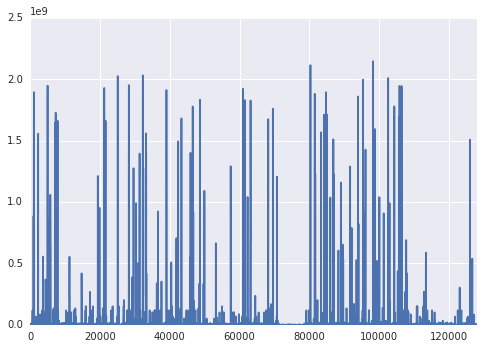

In [163]:
daily_df.ENTRIES.plot()

In [144]:
daily_df[daily_df.ENTRIES == 0]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
280,A002,R051,02-05-01,59 ST,08/20/2016,0
281,A002,R051,02-05-01,59 ST,08/21/2016,0
282,A002,R051,02-05-01,59 ST,08/22/2016,0
283,A002,R051,02-05-01,59 ST,08/23/2016,0
284,A002,R051,02-05-01,59 ST,08/24/2016,0
285,A002,R051,02-05-01,59 ST,08/25/2016,0
286,A002,R051,02-05-01,59 ST,08/26/2016,0
287,A002,R051,02-05-01,59 ST,08/27/2016,0
288,A002,R051,02-05-01,59 ST,08/28/2016,0
289,A002,R051,02-05-01,59 ST,08/29/2016,0


Aside from some values seemingly stuck, there are `ENTRIES` that are 0. Let's try to create a `daily_df1` based on first entry for the day. 

In [167]:
daily_df1 = (df
 .groupby(['C/A','UNIT','SCP','STATION','DATE']) # turnstile and date
 .ENTRIES.first() # first record for a turnstile and date
 .reset_index()
 )
daily_df1

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/20/2016,5790246
1,A002,R051,02-00-00,59 ST,08/21/2016,5791095
2,A002,R051,02-00-00,59 ST,08/22/2016,5791766
3,A002,R051,02-00-00,59 ST,08/23/2016,5793399
4,A002,R051,02-00-00,59 ST,08/24/2016,5795047
5,A002,R051,02-00-00,59 ST,08/25/2016,5796665
6,A002,R051,02-00-00,59 ST,08/26/2016,5797976
7,A002,R051,02-00-00,59 ST,08/27/2016,5799442
8,A002,R051,02-00-00,59 ST,08/28/2016,5800252
9,A002,R051,02-00-00,59 ST,08/29/2016,5800934


In [168]:
daily_df1.ENTRIES.describe() # daily df based on first entry

count    1.279e+05
mean     3.534e+07
std      1.950e+08
min      0.000e+00
25%      5.682e+05
50%      2.612e+06
75%      6.567e+06
max      2.147e+09
Name: ENTRIES, dtype: float64

In [169]:
daily_df.ENTRIES.describe() # daily df based on last entry

count    1.279e+05
mean     3.534e+07
std      1.949e+08
min      0.000e+00
25%      5.681e+05
50%      2.612e+06
75%      6.568e+06
max      2.147e+09
Name: ENTRIES, dtype: float64

There doesn't seem to be much difference. There are still `ENTRIES` values that seem suspect (e.g. zero).

In [170]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127940 entries, 0 to 127939
Data columns (total 6 columns):
C/A        127940 non-null object
UNIT       127940 non-null object
SCP        127940 non-null object
STATION    127940 non-null object
DATE       127940 non-null object
ENTRIES    127940 non-null int64
dtypes: int64(1), object(5)
memory usage: 5.9+ MB


In [171]:
daily_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127940 entries, 0 to 127939
Data columns (total 6 columns):
C/A        127940 non-null object
UNIT       127940 non-null object
SCP        127940 non-null object
STATION    127940 non-null object
DATE       127940 non-null object
ENTRIES    127940 non-null int64
dtypes: int64(1), object(5)
memory usage: 5.9+ MB


One way to explore this is to compare today's entries to previous days, which is effectively a differencing operation.  

In [172]:
daily_df1['ENTRIES_DIFF'] = daily_df1.ENTRIES.diff()
daily_df1.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,ENTRIES_DIFF
0,A002,R051,02-00-00,59 ST,08/20/2016,5790246,NaN
1,A002,R051,02-00-00,59 ST,08/21/2016,5791095,849.0
2,A002,R051,02-00-00,59 ST,08/22/2016,5791766,671.0
3,A002,R051,02-00-00,59 ST,08/23/2016,5793399,1633.0
4,A002,R051,02-00-00,59 ST,08/24/2016,5795047,1648.0


In [176]:
daily_df['ENTRIES_DIFF'] = daily_df.ENTRIES.diff()
daily_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,ENTRIES_DIFF
0,A002,R051,02-00-00,59 ST,08/20/2016,5790926,NaN
1,A002,R051,02-00-00,59 ST,08/21/2016,5791648,722.0
2,A002,R051,02-00-00,59 ST,08/22/2016,5793152,1504.0
3,A002,R051,02-00-00,59 ST,08/23/2016,5794827,1675.0
4,A002,R051,02-00-00,59 ST,08/24/2016,5796445,1618.0


In [177]:
# remove first row (NaN) that we lose from differencing
daily_df1.dropna(subset = ['ENTRIES_DIFF'], axis = 0, inplace = True)

In [178]:
daily_df.dropna(subset = ['ENTRIES_DIFF'], axis = 0, inplace = True)

In [179]:
daily_df1.head() # first entry of each day

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,ENTRIES_DIFF
1,A002,R051,02-00-00,59 ST,08/21/2016,5791095,849.0
2,A002,R051,02-00-00,59 ST,08/22/2016,5791766,671.0
3,A002,R051,02-00-00,59 ST,08/23/2016,5793399,1633.0
4,A002,R051,02-00-00,59 ST,08/24/2016,5795047,1648.0
5,A002,R051,02-00-00,59 ST,08/25/2016,5796665,1618.0


In [180]:
daily_df.head() # last entry of each day

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,ENTRIES_DIFF
1,A002,R051,02-00-00,59 ST,08/21/2016,5791648,722.0
2,A002,R051,02-00-00,59 ST,08/22/2016,5793152,1504.0
3,A002,R051,02-00-00,59 ST,08/23/2016,5794827,1675.0
4,A002,R051,02-00-00,59 ST,08/24/2016,5796445,1618.0
5,A002,R051,02-00-00,59 ST,08/25/2016,5797735,1290.0


Henceforth, let's work with `daily_df1`, which uses the first record for the day for `ENTRIES`.

In [192]:
daily_df1.ENTRIES.describe()

count    1.279e+05
mean     3.534e+07
std      1.950e+08
min      0.000e+00
25%      5.682e+05
50%      2.612e+06
75%      6.567e+06
max      2.147e+09
Name: ENTRIES, dtype: float64

In [193]:
daily_df1.ENTRIES_DIFF.value_counts().sort_index()

-2.147e+09    1
-2.108e+09    1
-2.028e+09    1
-2.022e+09    1
-2.003e+09    1
-1.987e+09    1
-1.944e+09    1
-1.941e+09    1
-1.938e+09    1
-1.935e+09    1
             ..
 1.923e+09    1
 1.938e+09    1
 1.945e+09    1
 1.945e+09    1
 1.948e+09    1
 1.992e+09    1
 2.007e+09    1
 2.022e+09    1
 2.105e+09    1
 2.147e+09    1
Name: ENTRIES_DIFF, dtype: int64

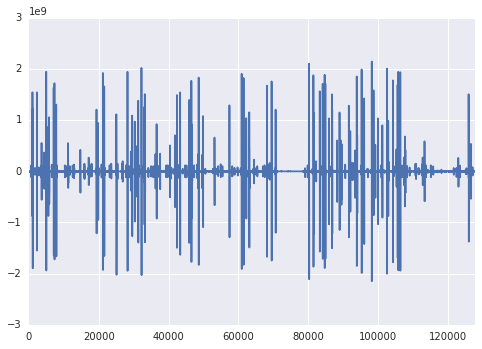

In [188]:
daily_df1.ENTRIES_DIFF.plot()

In [189]:
daily_df1.ENTRIES_DIFF.max()

2147097970.0

In [190]:
daily_df1.ENTRIES_DIFF.min()

-2147154517.0

In [195]:
daily_df1.ENTRIES_DIFF.describe()

count    1.279e+05
mean    -4.521e+01
std      5.042e+07
min     -2.147e+09
25%      2.340e+02
50%      7.790e+02
75%      1.564e+03
max      2.147e+09
Name: ENTRIES_DIFF, dtype: float64

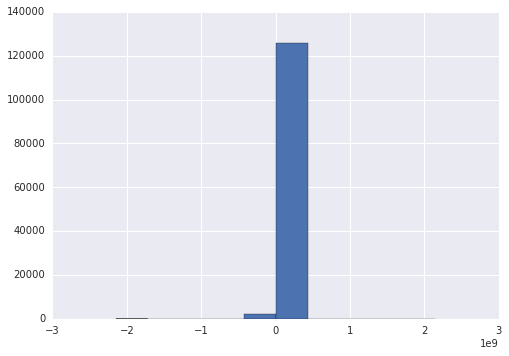

In [194]:
plt.hist(daily_df1.ENTRIES_DIFF);

From the time series plot of differences above, and by calling the min() and max() on `ENTRIES_DIFF`, we can see that the values go from a minimum of about a little less than -2 BILLION to a maximum of about a little more than +2 BILLION.

However, we can see that the middle 50% of the values for `ENTRIES_DIFF` (i.e. the inter-quartile range (IQR) of its distribution) is 1564-234 = 1330. In other words, most of the daily differences are between 234 and 1564.

If we look at a histogram of values for the differences, we see that most values fall well within even half a billion.

In [214]:
# Arbitrarily, let's see how many records have an abs DIFF > 1 Million
# 3154/127940 ~ 2.5 % of the sample lost
daily_df1[daily_df1['ENTRIES_DIFF'].abs() > 1000000].count()

C/A             3154
UNIT            3154
SCP             3154
STATION         3154
DATE            3154
ENTRIES         3154
ENTRIES_DIFF    3154
dtype: int64

In [215]:
# How about more than twice the IQR (1330 x 2 = 2660)
# 13821/127940 ~ 10.8 % of the sample lost
daily_df1[daily_df1['ENTRIES_DIFF'].abs() > 2660].count()

C/A             13821
UNIT            13821
SCP             13821
STATION         13821
DATE            13821
ENTRIES         13821
ENTRIES_DIFF    13821
dtype: int64

In [217]:
# How about more than thrice the IQR (1330 x 3 = 3990)
# 6667/127940 ~ 5.2 % of the sample lost
daily_df1[daily_df1['ENTRIES_DIFF'].abs() > 3990].count()

C/A             6667
UNIT            6667
SCP             6667
STATION         6667
DATE            6667
ENTRIES         6667
ENTRIES_DIFF    6667
dtype: int64

In [219]:
# How about  3.5*IQR = 4655?
# 5510/127940 ~ 4.3 % of sample lost
daily_df1[daily_df1['ENTRIES_DIFF'].abs() > 4655].count()

C/A             5510
UNIT            5510
SCP             5510
STATION         5510
DATE            5510
ENTRIES         5510
ENTRIES_DIFF    5510
dtype: int64

In [220]:
# How about 4*IQR = 5320?
# 5047/127940 ~ 3.9% of sample lost
daily_df1[daily_df1['ENTRIES_DIFF'].abs() > 5320].count()

C/A             5047
UNIT            5047
SCP             5047
STATION         5047
DATE            5047
ENTRIES         5047
ENTRIES_DIFF    5047
dtype: int64

We can use the cutoffs above instead of an arbitrary cutoff (i.e. difference > 1 million) because most stations would not have such wild deviations from day to day.

For instance, even the daily differences for Grand Central Station shows an IQR (middle 50% of values) = 3104 - 259.2 = 2844.8, which is well within even 3 x IQR of the `ENTRIES_DIFF` for all stations. 

In [224]:
daily_df1[daily_df1.STATION == 'GRD CNTRL-42 ST'].ENTRIES_DIFF.describe()

count    1.686e+03
mean     4.382e+05
std      8.541e+07
min     -2.147e+09
25%      2.592e+02
50%      1.366e+03
75%      3.104e+03
max      2.147e+09
Name: ENTRIES_DIFF, dtype: float64

Let's exclude the records whose daily differences exceed 4 x IQR, which is still a generous subset. 

In [228]:
daily_df1 = daily_df1[daily_df1.ENTRIES_DIFF.abs() <= 5320]
daily_df1.info() # 122892 records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122892 entries, 1 to 127939
Data columns (total 7 columns):
C/A             122892 non-null object
UNIT            122892 non-null object
SCP             122892 non-null object
STATION         122892 non-null object
DATE            122892 non-null object
ENTRIES         122892 non-null int64
ENTRIES_DIFF    122892 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 7.5+ MB


In [230]:
daily_df1.ENTRIES_DIFF.describe()

count    122892.000
mean        997.440
std         997.608
min       -5200.000
25%         252.000
50%         775.000
75%        1515.000
max        5313.000
Name: ENTRIES_DIFF, dtype: float64

Whilst there are reasons for a negative daily difference, it would be more instructive to look at absolute differences.

To facilitate this, we transform the `ENTRIES_DIFF` to reflect the absolute differences.

Finally, we convert the `DATE` column to a datetime object, to faciliate easier plotting in the next step.

In [236]:
daily_df1['ENTRIES_DIFF'] = daily_df1['ENTRIES_DIFF'].abs()
daily_df1.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,ENTRIES_DIFF
1,A002,R051,02-00-00,59 ST,08/21/2016,5791095,849.0
2,A002,R051,02-00-00,59 ST,08/22/2016,5791766,671.0
3,A002,R051,02-00-00,59 ST,08/23/2016,5793399,1633.0
4,A002,R051,02-00-00,59 ST,08/24/2016,5795047,1648.0
5,A002,R051,02-00-00,59 ST,08/25/2016,5796665,1618.0


In [238]:
daily_df1.ENTRIES_DIFF.describe()

count    122892.000
mean       1028.446
std         965.612
min           0.000
25%         269.000
50%         789.000
75%        1532.000
max        5313.000
Name: ENTRIES_DIFF, dtype: float64

In [241]:
daily_df1['DATE'] = pd.to_datetime(daily_df1.DATE, format = '%m/%d/%Y')

In [242]:
daily_df1.DATE.dtype

dtype('<M8[ns]')

#### Exercise 1.4

Plot the daily differences for one turnstile.

Let's select the station with the largest absolute daily difference.

In [247]:
daily_df1[daily_df1.ENTRIES_DIFF == daily_df1.ENTRIES_DIFF.max()]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,ENTRIES_DIFF
119113,R533,R055,00-03-00,FLUSHING-MAIN,2016-08-23,11483259,5313.0


In [248]:
# station/turnstile mask
flushing_turnstile = ((daily_df1['C/A'] == 'R533') & 
                      (daily_df1['UNIT'] == 'R055') &
                      (daily_df1['SCP'] == '00-03-00') &
                      (daily_df1['STATION'] == 'FLUSHING-MAIN'))

In [249]:
daily_df1[flushing_turnstile] # 12 data points

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,ENTRIES_DIFF
119111,R533,R055,00-03-00,FLUSHING-MAIN,2016-08-21,11474943,3578.0
119112,R533,R055,00-03-00,FLUSHING-MAIN,2016-08-22,11477946,3003.0
119113,R533,R055,00-03-00,FLUSHING-MAIN,2016-08-23,11483259,5313.0
119115,R533,R055,00-03-00,FLUSHING-MAIN,2016-08-25,11493850,5264.0
119118,R533,R055,00-03-00,FLUSHING-MAIN,2016-08-28,11508274,3698.0
119119,R533,R055,00-03-00,FLUSHING-MAIN,2016-08-29,11511423,3149.0
119123,R533,R055,00-03-00,FLUSHING-MAIN,2016-09-02,11533237,5293.0
119125,R533,R055,00-03-00,FLUSHING-MAIN,2016-09-04,11542672,3770.0
119126,R533,R055,00-03-00,FLUSHING-MAIN,2016-09-05,11545836,3164.0
119127,R533,R055,00-03-00,FLUSHING-MAIN,2016-09-06,11549062,3226.0


In [251]:
flush_df = daily_df1[flushing_turnstile]

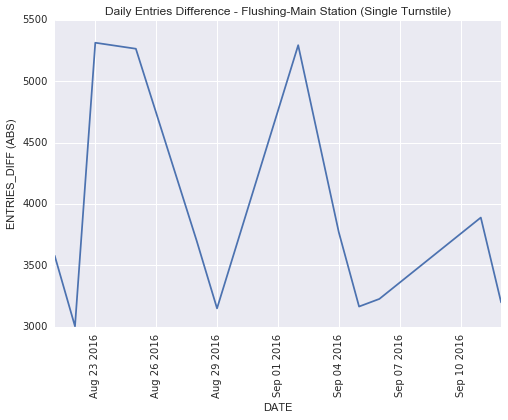

In [280]:
plt.plot(flush_df.DATE, flush_df.ENTRIES_DIFF)
plt.xticks(rotation = 90)
plt.title('Daily Entries Difference - Flushing-Main Station (Single Turnstile)')
plt.ylabel('ENTRIES_DIFF (ABS)')
plt.xlabel('DATE')

#### Exercise 1.5

Aggregate all turnstiles for each unique Control Area, Unit, and Station ('C/A', 'UNIT', 'STATION') combination for each day.

This effectively aggregates all the turnstiles ('SCPs') for each C/A/UNIT/STATION/DAY. We do this through a groupby ('C/A', 'UNIT', 'STATION', 'DATE').

Note that a Control Area ('C/A') is a booth in a station. Effectively, this aggregation groups by Booth ('C/A'), Remote Unit ('UNIT') and Subway Station ('STATION'). Or more clearly, grouping all turnstiles into some kind of sub-grouping within a station.

In [259]:
booth_remote_grouping = (daily_df1
                        .groupby(['C/A', 'UNIT', 'STATION','DATE'])
                        .ENTRIES_DIFF.sum()
                        .reset_index())
booth_remote_grouping.head()

,C/A,UNIT,STATION,DATE,ENTRIES_DIFF
0,A002,R051,59 ST,2016-08-20,1310.0
1,A002,R051,59 ST,2016-08-21,9119.0
2,A002,R051,59 ST,2016-08-22,7332.0
3,A002,R051,59 ST,2016-08-23,16071.0
4,A002,R051,59 ST,2016-08-24,16805.0


In [258]:
booth_remote_grouping.info() # 727 turnstile groupings (system-wide)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 4 columns):
C/A             727 non-null object
UNIT            727 non-null object
STATION         727 non-null object
ENTRIES_DIFF    727 non-null float64
dtypes: float64(1), object(3)
memory usage: 22.8+ KB


#### Exercise 1.6

Aggregate all the turnstiles within a station.

Effectively, we need to group by ('STATION', 'DATE'), and compute the sum of all the daily differences from each turnstile.

In [260]:
station_grouping = (daily_df1
                   .groupby(['STATION','DATE'])
                   .ENTRIES_DIFF.sum()
                   .reset_index())
station_grouping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10172 entries, 0 to 10171
Data columns (total 3 columns):
STATION         10172 non-null object
DATE            10172 non-null datetime64[ns]
ENTRIES_DIFF    10172 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 238.5+ KB


In [261]:
station_grouping.head()

,STATION,DATE,ENTRIES_DIFF
0,1 AV,2016-08-21,14984.0
1,1 AV,2016-08-22,11098.0
2,1 AV,2016-08-23,18569.0
3,1 AV,2016-08-24,19695.0
4,1 AV,2016-08-25,20057.0


In [267]:
# 28 days per station
# 10172 records / 28 days ~ 363 stations
# There are 469 stations (422 if connected stations are counted as one)
station_grouping.DATE.unique()

array(['2016-08-21T00:00:00.000000000', '2016-08-22T00:00:00.000000000',
       '2016-08-23T00:00:00.000000000', '2016-08-24T00:00:00.000000000',
       '2016-08-25T00:00:00.000000000', '2016-08-26T00:00:00.000000000',
       '2016-08-27T00:00:00.000000000', '2016-08-28T00:00:00.000000000',
       '2016-08-29T00:00:00.000000000', '2016-08-30T00:00:00.000000000',
       '2016-08-31T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-09-02T00:00:00.000000000', '2016-09-03T00:00:00.000000000',
       '2016-09-04T00:00:00.000000000', '2016-09-05T00:00:00.000000000',
       '2016-09-06T00:00:00.000000000', '2016-09-07T00:00:00.000000000',
       '2016-09-08T00:00:00.000000000', '2016-09-09T00:00:00.000000000',
       '2016-09-10T00:00:00.000000000', '2016-09-11T00:00:00.000000000',
       '2016-09-12T00:00:00.000000000', '2016-09-13T00:00:00.000000000',
       '2016-09-14T00:00:00.000000000', '2016-09-15T00:00:00.000000000',
       '2016-09-16T00:00:00.000000000', '2016-08-20

#### Exercise 1.7

Plot the time series for a station.

Let's select the station with the highest daily difference.

In [270]:
# Penn Station seems to have highest (abs) daily difference
station_grouping[station_grouping.ENTRIES_DIFF == 
                 station_grouping.ENTRIES_DIFF.max()]

,STATION,DATE,ENTRIES_DIFF
1686,34 ST-PENN STA,2016-09-14,177652.0


In [276]:
# mask for Penn Station
penn_station = (station_grouping['STATION'] == '34 ST-PENN STA')
penn_df = station_grouping[penn_station]
penn_df.info() # 28 records (abs daily difference for Penn Station)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1661 to 1688
Data columns (total 3 columns):
STATION         28 non-null object
DATE            28 non-null datetime64[ns]
ENTRIES_DIFF    28 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 896.0+ bytes


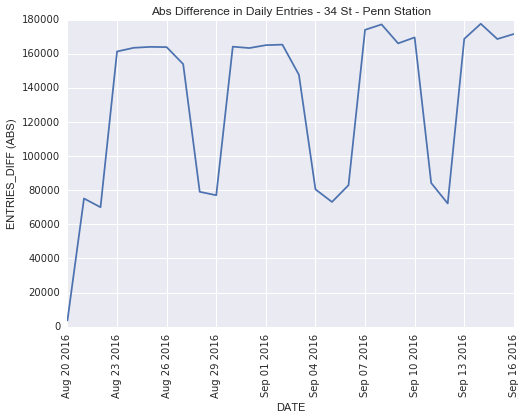

In [279]:
plt.plot(penn_df.DATE, penn_df.ENTRIES_DIFF)
plt.xticks(rotation = 90)
plt.title('Abs Difference in Daily Entries - 34 St - Penn Station')
plt.ylabel('ENTRIES_DIFF (ABS)')
plt.xlabel('DATE')

#### Exercise 1.8

Plot each week's daily difference in entries for a station.

To do this, we need to engineer a feature to represent the day of the week, which we can simply call `DAY`. We then plot the daily difference against the day of the week.

In [281]:
station_grouping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10172 entries, 0 to 10171
Data columns (total 3 columns):
STATION         10172 non-null object
DATE            10172 non-null datetime64[ns]
ENTRIES_DIFF    10172 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 238.5+ KB


In [284]:
station_grouping['DAY'] = station_grouping['DATE'].dt.weekday
station_grouping.head()

,STATION,DATE,ENTRIES_DIFF,DAY
0,1 AV,2016-08-21,14984.0,6
1,1 AV,2016-08-22,11098.0,0
2,1 AV,2016-08-23,18569.0,1
3,1 AV,2016-08-24,19695.0,2
4,1 AV,2016-08-25,20057.0,3


In [286]:
station_grouping['DATE'].dt.week.unique()

array([33, 34, 35, 36, 37])

In [287]:
station_grouping['WEEK'] = station_grouping['DATE'].dt.week
station_grouping.head()

,STATION,DATE,ENTRIES_DIFF,DAY,WEEK
0,1 AV,2016-08-21,14984.0,6,33
1,1 AV,2016-08-22,11098.0,0,34
2,1 AV,2016-08-23,18569.0,1,34
3,1 AV,2016-08-24,19695.0,2,34
4,1 AV,2016-08-25,20057.0,3,34


In [288]:
station_grouping.tail()

,STATION,DATE,ENTRIES_DIFF,DAY,WEEK
10167,ZEREGA AV,2016-09-12,1058.0,0,37
10168,ZEREGA AV,2016-09-13,2408.0,1,37
10169,ZEREGA AV,2016-09-14,2833.0,2,37
10170,ZEREGA AV,2016-09-15,2843.0,3,37
10171,ZEREGA AV,2016-09-16,2890.0,4,37


Since weeks 33 and 37 are incomplete, let's just plot weeks 34-36.

Separate DataFrames are constructed for each week.

In [291]:
wk34_df = station_grouping[(station_grouping.WEEK == 34)]
wk35_df = station_grouping[(station_grouping.WEEK == 35)]
wk36_df = station_grouping[(station_grouping.WEEK == 36)]

In [292]:
wk34_df.head()

,STATION,DATE,ENTRIES_DIFF,DAY,WEEK
1,1 AV,2016-08-22,11098.0,0,34
2,1 AV,2016-08-23,18569.0,1,34
3,1 AV,2016-08-24,19695.0,2,34
4,1 AV,2016-08-25,20057.0,3,34
5,1 AV,2016-08-26,19914.0,4,34


In [302]:
# Penn Station is still busiest
(station_grouping
.groupby(['STATION', 'WEEK'])
.ENTRIES_DIFF.sum()
.sort_values(ascending = False))

STATION          WEEK
34 ST-PENN STA   35      963562.0
                 34      956161.0
                 36      927605.0
                 37      759058.0
34 ST-HERALD SQ  35      697375.0
                 34      687327.0
23 ST            35      668224.0
                 36      667392.0
                 34      650229.0
34 ST-HERALD SQ  36      633158.0
                           ...   
LIVONIA AV       33           0.0
SARATOGA AV      36           0.0
                 34           0.0
                 33           0.0
9TH STREET       33           0.0
NEWARK HM HE     35           0.0
EAST 105 ST      33           0.0
TWENTY THIRD ST  33           0.0
PENNSYLVANIA AV  36           0.0
                 34           0.0
Name: ENTRIES_DIFF, dtype: float64

In [305]:
penn_wk34_df = wk34_df[wk34_df['STATION'] == '34 ST-PENN STA']
penn_wk35_df = wk35_df[wk35_df['STATION'] == '34 ST-PENN STA']
penn_wk36_df = wk36_df[wk36_df['STATION'] == '34 ST-PENN STA']

In [306]:
penn_wk34_df.head()

,STATION,DATE,ENTRIES_DIFF,DAY,WEEK
1663,34 ST-PENN STA,2016-08-22,70051.0,0,34
1664,34 ST-PENN STA,2016-08-23,161394.0,1,34
1665,34 ST-PENN STA,2016-08-24,163552.0,2,34
1666,34 ST-PENN STA,2016-08-25,164109.0,3,34
1667,34 ST-PENN STA,2016-08-26,163951.0,4,34


In [310]:
penn_wk34_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1663 to 1669
Data columns (total 5 columns):
STATION         7 non-null object
DATE            7 non-null datetime64[ns]
ENTRIES_DIFF    7 non-null float64
DAY             7 non-null int64
WEEK            7 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 336.0+ bytes


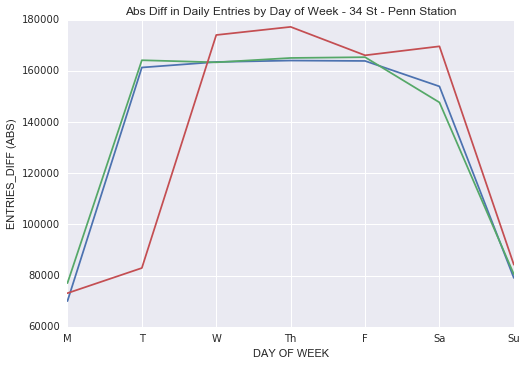

In [311]:
plt.plot(penn_wk34_df.DAY, penn_wk34_df.ENTRIES_DIFF)
plt.plot(penn_wk35_df.DAY, penn_wk35_df.ENTRIES_DIFF)
plt.plot(penn_wk36_df.DAY, penn_wk36_df.ENTRIES_DIFF)

days_int = [0,1,2,3,4,5,6]
days_str = ['M','T','W','Th','F','Sa','Su']
plt.xticks(days_int, days_str)
plt.title('Abs Diff in Daily Entries by Day of Week - 34 St - Penn Station')
plt.ylabel('ENTRIES_DIFF (ABS)')
plt.xlabel('DAY OF WEEK')

#### Exercise 1.9

Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the period investigated.

In [312]:
station_grouping.head()

,STATION,DATE,ENTRIES_DIFF,DAY,WEEK
0,1 AV,2016-08-21,14984.0,6,33
1,1 AV,2016-08-22,11098.0,0,34
2,1 AV,2016-08-23,18569.0,1,34
3,1 AV,2016-08-24,19695.0,2,34
4,1 AV,2016-08-25,20057.0,3,34


In [322]:
top_stations_df = (station_grouping
.groupby('STATION') # aggregate over 'STATION'
.ENTRIES_DIFF
.sum() # sum all entries over all weeks
.reset_index()
[['STATION', 'ENTRIES_DIFF']] # cols to include
.sort_values('ENTRIES_DIFF', ascending = False))
top_stations_df.head(10)

,STATION,ENTRIES_DIFF
61,34 ST-PENN STA,3.685e+06
46,23 ST,2.636e+06
59,34 ST-HERALD SQ,2.577e+06
68,42 ST-PORT AUTH,2.309e+06
348,TIMES SQ-42 ST,2.228e+06
230,GRD CNTRL-42 ST,2.195e+06
223,FULTON ST,2.110e+06
109,86 ST,2.039e+06
14,14 ST-UNION SQ,1.959e+06
9,125 ST,1.881e+06


In [325]:
len(top_stations_df) # 373 stations

373

#### Exercise 1.10

Plot the total ridership for each station.

Hint: Use a `plt.bar` graph.
indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values))

For this, we'll use the top_stations_df.ENTRIES_DIFF Series.

(-1, 373)

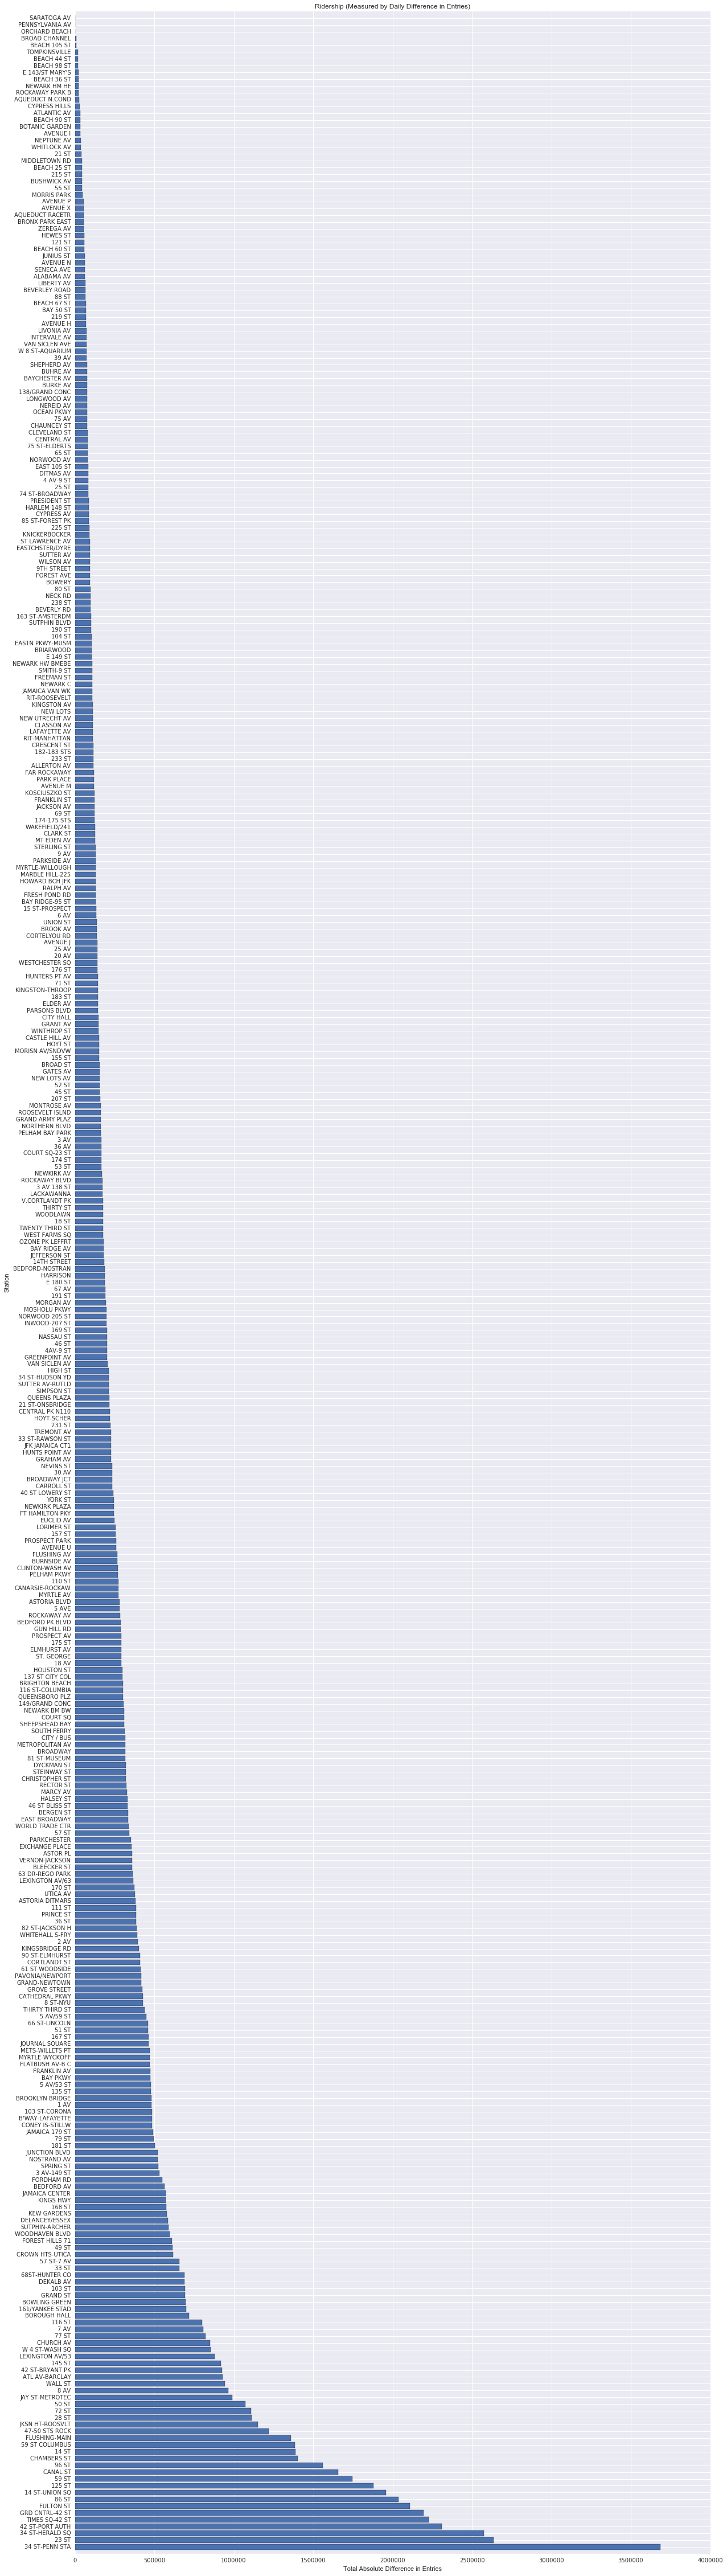

In [338]:
plt.figure(figsize = (20,80))
indices = list(range(len(top_stations_df)))
plt.barh(indices, top_stations_df.ENTRIES_DIFF, align = 'center')
plt.yticks(indices, top_stations_df.STATION);
plt.xlabel('Total Absolute Difference in Entries')
plt.ylabel('Station')
plt.title('Ridership (Measured by Daily Difference in Entries)')
plt.ylim(-1, len(top_stations_df))